#  Covid Cases of a city on 1st September 2020

### importing the basic libraries

In [1]:
import numpy as np
import pandas as pd

Importing the training and the test datasets

In [2]:
train = pd.read_excel('Train_dataset.xlsx')
test = pd.read_excel('Test_dataset.xlsx')

In [3]:
train.head()

,City,State,Type,Population [2011],Popuation [2001],Sex Ratio,Median Age,Avg Temp,SWM,Toilets Avl,Water Purity,H Index,Female Population,# of hospitals,Foreign Visitors,Covid Cases
0,Mumbai,Maharashtra,M.C,12442373.0,11978450.0,878.0,23.0,32.0,MEDIUM,219.0,150.0,0.700440,10924403.0,159.0,4408916.0,163115
1,Delhi,Delhi,M.C,11007835.0,9879172.0,858.0,27.0,30.0,MEDIUM,215.0,196.0,0.920018,9444722.0,148.0,2379169.0,80188
2,Bangalore,Karnataka,MPUA,8436675.0,4301326.0,936.0,28.0,37.0,HIGH,212.0,102.0,0.097085,7896728.0,123.0,636502.0,141000
3,Hyderabad,Telangana,MPUA,6809970.0,3637483.0,930.0,23.0,31.0,MEDIUM,217.0,118.0,0.827744,6333272.0,110.0,126078.0,55123
4,Ahmedabad,Gujarat,MPUA,5570585.0,3520085.0,852.0,29.0,25.0,LOW,227.0,109.0,0.847941,4746138.0,73.0,284973.0,33204


In [4]:
test.head()

,City,State,Type,Population [2011],Popuation [2001],Sex Ratio,Median Age,Avg Temp,SWM,Toilets Avl,Water Purity,H Index,Female Population,# of hospitals,Foreign Visitors
0,Tuensang,Nagaland,T.C,36774.0,NaN,931.0,23.0,10.0,MEDIUM,94.0,114.0,0.253390,34237.0,17.0,2769.0
1,Lakshmeshwar,Karnataka,T.M.C,36754.0,NaN,934.0,25.0,38.0,HIGH,62.0,160.0,0.192555,34328.0,13.0,636502.0
2,Zira,Punjab,M.Cl.,36732.0,NaN,883.0,29.0,35.0,HIGH,63.0,105.0,0.887882,32434.0,17.0,242367.0
3,Yawal,Maharashtra,M.Cl,36706.0,NaN,887.0,26.0,31.0,HIGH,60.0,174.0,0.407838,32558.0,11.0,4408916.0
4,Thana Bhawan,Uttar Pradesh,N.P.,36669.0,NaN,877.0,28.0,39.0,LOW,92.0,153.0,0.324456,32159.0,23.0,3104060.0


#### we keep these as original copies of the data incase we need them again

In [5]:
train_org = train.copy()
test_org = test.copy()

#### overview of train dataset

In [6]:
train.describe()

,Population [2011],Popuation [2001],Sex Ratio,Median Age,Avg Temp,Toilets Avl,Water Purity,H Index,Female Population,# of hospitals,Foreign Visitors,Covid Cases
count,7.390000e+02,2.950000e+02,777.000000,769.000000,770.000000,761.000000,629.000000,647.000000,6.460000e+02,772.000000,6.970000e+02,787.00000
mean,3.102834e+05,5.320451e+05,905.712999,26.183355,30.941558,96.086728,150.373609,0.497069,2.910011e+05,41.849741,1.457945e+06,6615.64676
std,8.874849e+05,1.067831e+06,37.018542,2.113063,6.968289,30.532991,29.063767,0.293421,8.354348e+05,29.086939,1.664151e+06,15108.10276
min,3.677600e+04,2.935400e+04,818.000000,23.000000,5.000000,50.000000,100.000000,0.003074,3.091300e+04,10.000000,7.980000e+02,334.00000
25%,5.255000e+04,1.694320e+05,877.000000,24.000000,28.000000,70.000000,125.000000,0.238586,4.514450e+04,18.000000,2.378540e+05,2270.00000
50%,7.910600e+04,2.366000e+05,906.000000,26.000000,31.000000,92.000000,150.000000,0.507004,8.306750e+04,28.000000,6.365020e+05,2582.00000
75%,2.374765e+05,4.745850e+05,928.000000,28.000000,36.000000,119.000000,176.000000,0.752517,2.206772e+05,67.000000,3.104060e+06,8761.00000
max,1.244237e+07,1.197845e+07,1042.000000,32.000000,40.000000,227.000000,200.000000,0.999774,1.092440e+07,159.000000,4.684707e+06,218502.00000


In [7]:
train.shape

(787, 16)

In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 787 entries, 0 to 786
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   City               787 non-null    object 
 1   State              787 non-null    object 
 2   Type               787 non-null    object 
 3   Population [2011]  739 non-null    float64
 4   Popuation [2001]   295 non-null    float64
 5   Sex Ratio          777 non-null    float64
 6   Median Age         769 non-null    float64
 7   Avg Temp           770 non-null    float64
 8   SWM                783 non-null    object 
 9   Toilets Avl        761 non-null    float64
 10  Water Purity       629 non-null    float64
 11  H Index            647 non-null    float64
 12  Female Population  646 non-null    float64
 13  # of hospitals     772 non-null    float64
 14  Foreign Visitors   697 non-null    float64
 15  Covid Cases        787 non-null    int64  
dtypes: float64(11), int64(1), 

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

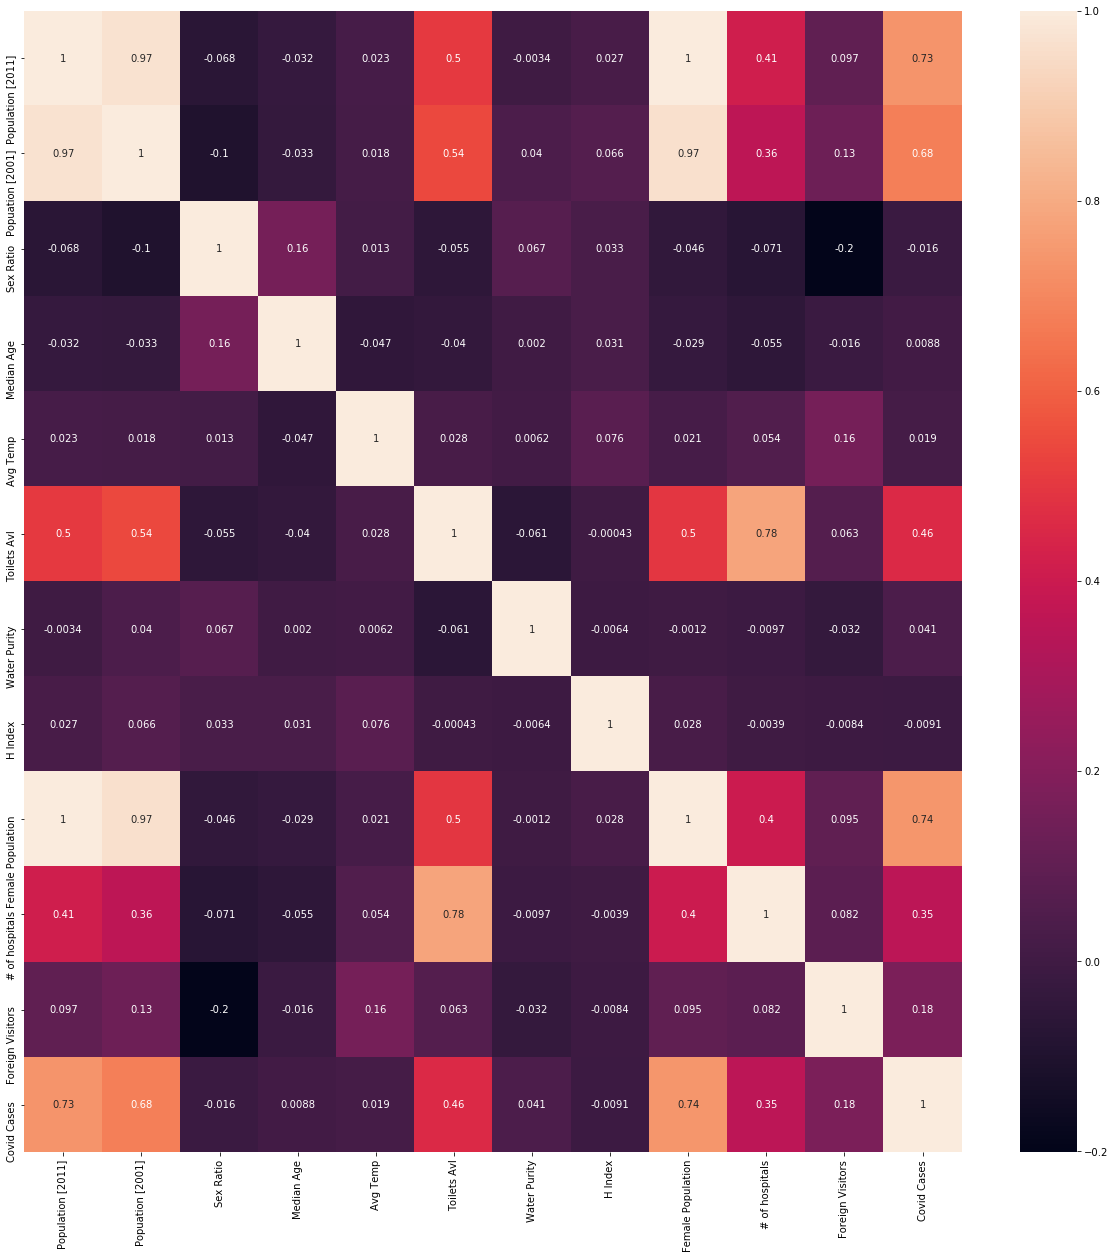

In [10]:
plt.figure(figsize =(21,21))
sns.heatmap(train.corr(), annot = True)

##### null values or missing values

In [11]:
train.isnull().sum()

City                   0
State                  0
Type                   0
Population [2011]     48
Popuation [2001]     492
Sex Ratio             10
Median Age            18
Avg Temp              17
SWM                    4
Toilets Avl           26
Water Purity         158
H Index              140
Female Population    141
# of hospitals        15
Foreign Visitors      90
Covid Cases            0
dtype: int64

#####  Since there are more than 60% of null values in population [2001] we drop it

In [12]:
train = train.drop(['Popuation [2001]'],axis = 1)

In [13]:
train.shape

(787, 15)

#### replacing the null values one by one

#### 1. Population [2011]

In [14]:
train["Population [2011]"].value_counts(normalize = True)

37802.0     0.002706
42461.0     0.002706
45858.0     0.002706
70777.0     0.002706
206167.0    0.002706
              ...   
711329.0    0.001353
52394.0     0.001353
67751.0     0.001353
126389.0    0.001353
283648.0    0.001353
Name: Population [2011], Length: 730, dtype: float64

In [15]:
train['Population [2011]'].mean()

310283.4167794317

In [16]:
train['Population [2011]'].median()

79106.0

In [17]:
train['Population [2011]'].mode()

0     37802.0
1     38554.0
2     42461.0
3     45858.0
4     49985.0
5     61632.0
6     65232.0
7     70777.0
8    206167.0
dtype: float64

Since the three measures of central tendencies are very different, we go on and replace the null values with forward/backward fill for now.

forward fill

In [18]:
train2 = train.copy()

In [19]:
train2["Population [2011]"].fillna(method='ffill', inplace = True)

In [20]:
train2["Population [2011]"].isnull().sum()

0

In [21]:
train2['Population [2011]'].mean()

306053.26429479034

In [22]:
train2['Population [2011]'].median()

79121.0

In [23]:
train2['Population [2011]'].mode()

0    91379.0
dtype: float64

backward fill

In [24]:
train2 = train.copy()

In [25]:
train2["Population [2011]"].fillna(method='bfill', inplace = True)

In [26]:
train2["Population [2011]"].isnull().sum()

0

In [27]:
train2['Population [2011]'].mean()

304457.4866581957

In [28]:
train2['Population [2011]'].median()

79121.0

In [29]:
train2['Population [2011]'].mode()

0    88430.0
dtype: float64

It is observed that both the methods yield same results

In [31]:
train = train2.copy()

In [32]:
train['Population [2011]'].isnull().sum()

0

#### 2. Sex Ratio

In [33]:
train["Sex Ratio"].value_counts(normalize = True)

923.0     0.024453
871.0     0.019305
922.0     0.018018
872.0     0.018018
882.0     0.014157
            ...   
832.0     0.001287
956.0     0.001287
943.0     0.001287
1031.0    0.001287
933.0     0.001287
Name: Sex Ratio, Length: 160, dtype: float64

In [34]:
train['Sex Ratio'].mean()

905.7129987129987

In [35]:
train['Sex Ratio'].median()

906.0

In [36]:
train['Sex Ratio'].mode()

0    923.0
dtype: float64

Replacing the null values with median of the attrubute

In [37]:
train['Sex Ratio'].fillna(train['Sex Ratio'].mean(), inplace = True)

In [38]:
train.isnull().sum()

City                   0
State                  0
Type                   0
Population [2011]      0
Sex Ratio              0
Median Age            18
Avg Temp              17
SWM                    4
Toilets Avl           26
Water Purity         158
H Index              140
Female Population    141
# of hospitals        15
Foreign Visitors      90
Covid Cases            0
dtype: int64

#### 3. Median Age

In [39]:
train['Median Age'].value_counts(normalize = True)

28.0    0.152146
25.0    0.150845
24.0    0.140442
29.0    0.140442
26.0    0.131339
27.0    0.127438
23.0    0.126138
30.0    0.018205
31.0    0.010403
32.0    0.002601
Name: Median Age, dtype: float64

In [40]:
train['Median Age'].mean()

26.18335500650195

In [41]:
train['Median Age'].median()

26.0

In [42]:
train['Median Age'].mode()

0    28.0
dtype: float64

replacing null values with median of the attrbute

In [43]:
train['Median Age'].fillna(train['Median Age'].median(), inplace = True)

In [44]:
train['Median Age'].value_counts(normalize = True)

26.0    0.151207
28.0    0.148666
25.0    0.147395
24.0    0.137230
29.0    0.137230
27.0    0.124524
23.0    0.123253
30.0    0.017789
31.0    0.010165
32.0    0.002541
Name: Median Age, dtype: float64

In [45]:
train['Median Age'].mean()

26.179161372299873

In [46]:
train['Median Age'].median()

26.0

In [47]:
train['Median Age'].mode()

0    26.0
dtype: float64

In [48]:
train.isnull().sum()

City                   0
State                  0
Type                   0
Population [2011]      0
Sex Ratio              0
Median Age             0
Avg Temp              17
SWM                    4
Toilets Avl           26
Water Purity         158
H Index              140
Female Population    141
# of hospitals        15
Foreign Visitors      90
Covid Cases            0
dtype: int64

#### 4. Avg Temp

In [49]:
train['Avg Temp'].value_counts(normalize = True)

30.0    0.074026
37.0    0.068831
26.0    0.068831
29.0    0.064935
33.0    0.063636
28.0    0.061039
25.0    0.061039
40.0    0.061039
38.0    0.058442
31.0    0.058442
35.0    0.058442
27.0    0.054545
34.0    0.051948
32.0    0.051948
39.0    0.045455
36.0    0.038961
8.0     0.009091
15.0    0.007792
11.0    0.006494
5.0     0.006494
12.0    0.006494
6.0     0.005195
10.0    0.005195
9.0     0.005195
13.0    0.003896
7.0     0.002597
Name: Avg Temp, dtype: float64

In [50]:
train['Avg Temp'].mean()

30.941558441558442

In [51]:
train['Avg Temp'].median()

31.0

In [52]:
train['Avg Temp'].mode()

0    30.0
dtype: float64

In [53]:
train2 = train.copy()

In [54]:
train['Avg Temp'].fillna(train['Avg Temp'].median(), inplace = True)

In [55]:
train['Avg Temp'].value_counts(normalize = True)

31.0    0.078780
30.0    0.072427
37.0    0.067344
26.0    0.067344
29.0    0.063532
33.0    0.062262
28.0    0.059720
25.0    0.059720
40.0    0.059720
38.0    0.057179
35.0    0.057179
27.0    0.053367
34.0    0.050826
32.0    0.050826
39.0    0.044473
36.0    0.038119
8.0     0.008895
15.0    0.007624
11.0    0.006353
5.0     0.006353
12.0    0.006353
6.0     0.005083
10.0    0.005083
9.0     0.005083
13.0    0.003812
7.0     0.002541
Name: Avg Temp, dtype: float64

In [56]:
train['Avg Temp'].mean()

30.9428208386277

In [57]:
train['Avg Temp'].median()

31.0

In [58]:
train['Avg Temp'].mode()

0    31.0
dtype: float64

In [59]:
train.isnull().sum()

City                   0
State                  0
Type                   0
Population [2011]      0
Sex Ratio              0
Median Age             0
Avg Temp               0
SWM                    4
Toilets Avl           26
Water Purity         158
H Index              140
Female Population    141
# of hospitals        15
Foreign Visitors      90
Covid Cases            0
dtype: int64

#### 5. SWM (Solid Waste Management)

In [60]:
train['SWM'].value_counts(normalize = True)

HIGH      0.347382
LOW       0.332056
MEDIUM    0.320562
Name: SWM, dtype: float64

In [61]:
#train['SWM'].mean() # not valid as the values are categorical

In [62]:
#train['SWM'].median() # not valid as the values are categorical

In [63]:
train['SWM'].mode()

0    HIGH
dtype: object

replacing null values with the modal value of the attribute

In [64]:
train2 = train.copy()

In [65]:
train['SWM'].fillna(train['SWM'].mode()[0], inplace = True)

In [66]:
train['SWM'].value_counts(normalize = True)

HIGH      0.350699
LOW       0.330368
MEDIUM    0.318933
Name: SWM, dtype: float64

In [67]:
train.isnull().sum()

City                   0
State                  0
Type                   0
Population [2011]      0
Sex Ratio              0
Median Age             0
Avg Temp               0
SWM                    0
Toilets Avl           26
Water Purity         158
H Index              140
Female Population    141
# of hospitals        15
Foreign Visitors      90
Covid Cases            0
dtype: int64

#### 6. Toilets Avl

In [68]:
train['Toilets Avl'].value_counts()

66.0     15
65.0     15
90.0     15
100.0    14
91.0     14
         ..
227.0     1
210.0     1
217.0     1
212.0     1
219.0     1
Name: Toilets Avl, Length: 107, dtype: int64

In [69]:
train['Toilets Avl'].mean()

96.08672798948751

In [70]:
train['Toilets Avl'].median()

92.0

In [71]:
train['Toilets Avl'].mode()

0    65.0
1    66.0
2    90.0
dtype: float64

replace the null values with the three modal values of the attribute equally

In [72]:
train2 = train.copy()

In [73]:
train["Toilets Avl"] = train["Toilets Avl"].fillna(pd.Series(np.random.choice([65.0,66.0,90.0],p = [0.33,0.33,0.34],size =len(train))))

In [74]:
train['Toilets Avl'].value_counts()

90.0     28
66.0     22
65.0     21
91.0     14
100.0    14
         ..
227.0     1
210.0     1
217.0     1
212.0     1
219.0     1
Name: Toilets Avl, Length: 107, dtype: int64

In [75]:
train['Toilets Avl'].mean()

95.48157560355781

In [76]:
train['Toilets Avl'].median()

91.0

In [77]:
train['Toilets Avl'].mode()

0    90.0
dtype: float64

In [78]:
train.isnull().sum()

City                   0
State                  0
Type                   0
Population [2011]      0
Sex Ratio              0
Median Age             0
Avg Temp               0
SWM                    0
Toilets Avl            0
Water Purity         158
H Index              140
Female Population    141
# of hospitals        15
Foreign Visitors      90
Covid Cases            0
dtype: int64

#### 7. Water Purity

In [79]:
train['Water Purity'].value_counts()

129.0    12
134.0    12
115.0    11
105.0    11
116.0    11
         ..
111.0     2
183.0     2
146.0     2
190.0     1
196.0     1
Name: Water Purity, Length: 101, dtype: int64

In [80]:
train['Water Purity'].mean()

150.37360890302068

In [81]:
train['Water Purity'].median()

150.0

In [82]:
train['Water Purity'].mode()

0    129.0
1    134.0
dtype: float64

replacing null values using ffill/bfill

In [203]:
train2 = train.copy()

In [204]:
train['Water Purity'].fillna(method = 'ffill', inplace = True)

In [205]:
train['Water Purity'].value_counts()

143.0    117
131.0     23
129.0     20
161.0     18
172.0     14
        ... 
183.0      2
160.0      2
146.0      2
190.0      1
196.0      1
Name: Water Purity, Length: 101, dtype: int64

In [206]:
train['Water Purity'].mean()

149.15120711562898

In [207]:
train['Water Purity'].median()

143.0

In [208]:
train['Water Purity'].mode()

0    143.0
dtype: float64

bfill

In [216]:
train = train2.copy()

In [83]:
train['Water Purity'].fillna(method = 'bfill', inplace = True)

In [84]:
train['Water Purity'].value_counts()

143.0    117
131.0     23
129.0     20
161.0     18
172.0     14
        ... 
183.0      2
160.0      2
146.0      2
190.0      1
196.0      1
Name: Water Purity, Length: 101, dtype: int64

In [85]:
train['Water Purity'].mean()

149.15120711562898

In [86]:
train['Water Purity'].median()

143.0

In [87]:
train['Water Purity'].mode()

0    143.0
dtype: float64

In [88]:
train.isnull().sum()

City                   0
State                  0
Type                   0
Population [2011]      0
Sex Ratio              0
Median Age             0
Avg Temp               0
SWM                    0
Toilets Avl            0
Water Purity           0
H Index              140
Female Population    141
# of hospitals        15
Foreign Visitors      90
Covid Cases            0
dtype: int64

#### 8. H Index

In [89]:
train['H Index'].value_counts()

0.365209    1
0.076656    1
0.040447    1
0.438987    1
0.094579    1
           ..
0.206605    1
0.497846    1
0.061380    1
0.490544    1
0.695843    1
Name: H Index, Length: 647, dtype: int64

In [90]:
train['H Index'].mean()

0.4970691911347754

In [91]:
train['H Index'].median()

0.5070035548467232

In [92]:
train['H Index'].mode()

0      0.003074
1      0.004922
2      0.005168
3      0.006412
4      0.008756
         ...   
642    0.998757
643    0.999111
644    0.999139
645    0.999186
646    0.999774
Length: 647, dtype: float64

replacing null values using ffill/bfill

In [143]:
train2 = train.copy()

In [166]:
train['H Index'].fillna(method = 'ffill', inplace = True)

In [167]:
train['H Index'].value_counts()

0.206605    112
0.534604     15
0.326206      9
0.695842      6
0.548849      2
           ... 
0.346089      1
0.497846      1
0.061380      1
0.490544      1
0.695843      1
Name: H Index, Length: 647, dtype: int64

In [168]:
train['H Index'].mean()

0.45670237528938024

In [169]:
train['H Index'].median()

0.40891095402465083

In [170]:
train['H Index'].mode()

0    0.206605
dtype: float64

bfill

In [171]:
train = train2.copy()

In [202]:
train['H Index'].fillna(method = 'bfill', inplace = True)

In [173]:
train['H Index'].value_counts()

0.435589    112
0.257557     15
0.141696      9
0.282632      6
0.340974      2
           ... 
0.497846      1
0.061380      1
0.490544      1
0.936416      1
0.695843      1
Name: H Index, Length: 647, dtype: int64

In [174]:
train['H Index'].mean()

0.47912627485254716

In [175]:
train['H Index'].median()

0.43558892227907553

In [176]:
train['H Index'].mode()

0    0.435589
dtype: float64

#### Since ffill/bfill didn't yield satisfactory results, we go back and replace with mean

In [183]:
train = train2.copy()

In [93]:
train['H Index'].fillna(round(train['H Index'].mean(),6), inplace = True)

In [94]:
train['H Index'].value_counts()

0.497069    140
0.365209      1
0.679264      1
0.040447      1
0.438987      1
           ... 
0.206605      1
0.497846      1
0.061380      1
0.490544      1
0.695843      1
Name: H Index, Length: 648, dtype: int64

In [95]:
train['H Index'].mean()

0.4970691571336717

In [96]:
train['H Index'].median()

0.497069

In [97]:
train['H Index'].mode()

0    0.497069
dtype: float64

In [98]:
train.isnull().sum()

City                   0
State                  0
Type                   0
Population [2011]      0
Sex Ratio              0
Median Age             0
Avg Temp               0
SWM                    0
Toilets Avl            0
Water Purity           0
H Index                0
Female Population    141
# of hospitals        15
Foreign Visitors      90
Covid Cases            0
dtype: int64

#### 9. Female Population

In [99]:
train['Female Population'].value_counts()

35139.0      2
49671.0      1
55061.0      1
392871.0     1
218707.0     1
            ..
43708.0      1
40600.0      1
124374.0     1
2112174.0    1
192256.0     1
Name: Female Population, Length: 645, dtype: int64

In [100]:
train['Female Population'].mean()

291001.13931888546

In [101]:
train['Female Population'].median()

83067.5

In [102]:
train['Female Population'].mode()

0    35139.0
dtype: float64

replacing with ffill/bfill

ffill

In [104]:
train2  = train.copy()

In [105]:
train['Female Population'].fillna(method='ffill', inplace = True)

In [106]:
train['Female Population'].value_counts()

74367.0      112
783923.0      15
1190630.0      9
268485.0       6
46107.0        2
            ... 
40600.0        1
124374.0       1
2112174.0      1
90081.0        1
192256.0       1
Name: Female Population, Length: 645, dtype: int64

In [107]:
train['Female Population'].mean()

277286.25158831006

In [108]:
train['Female Population'].median()

74367.0

In [109]:
train['Female Population'].mode()

0    74367.0
dtype: float64

bfill

In [110]:
train = train2.copy()

In [111]:
train['Female Population'].fillna(method='bfill', inplace = True)

In [112]:
train['Female Population'].value_counts()

58964.0      112
568124.0      15
984041.0       9
243850.0       6
53436.0        2
            ... 
124374.0       1
2112174.0      1
1190630.0      1
90081.0        1
192256.0       1
Name: Female Population, Length: 645, dtype: int64

In [113]:
train['Female Population'].mean()

269021.0457433291

In [114]:
train['Female Population'].median()

58964.0

In [115]:
train['Female Population'].mode()

0    58964.0
dtype: float64

In [116]:
train.isnull().sum()

City                  0
State                 0
Type                  0
Population [2011]     0
Sex Ratio             0
Median Age            0
Avg Temp              0
SWM                   0
Toilets Avl           0
Water Purity          0
H Index               0
Female Population     0
# of hospitals       15
Foreign Visitors     90
Covid Cases           0
dtype: int64

#### 10. # of hospitals

In [118]:
train['# of hospitals'].value_counts()

26.0     34
10.0     31
13.0     28
29.0     27
30.0     27
         ..
65.0      2
110.0     1
123.0     1
148.0     1
159.0     1
Name: # of hospitals, Length: 76, dtype: int64

In [119]:
train['# of hospitals'].mean()

41.84974093264249

In [120]:
train['# of hospitals'].median()

28.0

In [121]:
train['# of hospitals'].mode()

0    26.0
dtype: float64

In [122]:
train2 = train.copy()

In [124]:
train['# of hospitals'].fillna(method='ffill', inplace = True)

In [125]:
train['# of hospitals'].value_counts()

26.0     34
10.0     31
13.0     28
29.0     27
30.0     27
         ..
65.0      2
110.0     1
123.0     1
148.0     1
159.0     1
Name: # of hospitals, Length: 76, dtype: int64

In [126]:
train['# of hospitals'].mean()

42.25412960609911

In [127]:
train['# of hospitals'].median()

28.0

In [128]:
train['# of hospitals'].mode()

0    26.0
dtype: float64

In [129]:
train.isnull().sum()

City                  0
State                 0
Type                  0
Population [2011]     0
Sex Ratio             0
Median Age            0
Avg Temp              0
SWM                   0
Toilets Avl           0
Water Purity          0
H Index               0
Female Population     0
# of hospitals        0
Foreign Visitors     90
Covid Cases           0
dtype: int64

#### 11. Foreign Visitors

In [130]:
train['Foreign Visitors'].value_counts()



237854.0     72
4408916.0    68
4684707.0    59
3104060.0    56
923737.0     46
636502.0     41
977479.0     39
284973.0     36
421365.0     34
126078.0     32
242367.0     32
1489500.0    31
1475311.0    28
66971.0      26
24720.0      20
167785.0     18
303118.0     15
6394.0       10
105882.0      9
58568.0       5
106153.0      4
541480.0      3
2769.0        2
2379169.0     2
798.0         2
38479.0       1
14674.0       1
406108.0      1
34886.0       1
3260.0        1
29538.0       1
8027.0        1
Name: Foreign Visitors, dtype: int64

In [131]:
train['Foreign Visitors'].mean()

1457944.992826399

In [132]:
train['Foreign Visitors'].median()

636502.0

In [133]:
train['Foreign Visitors'].mode()

0    237854.0
dtype: float64

In [134]:
train2 = train.copy()

In [135]:
train['Foreign Visitors'].fillna(method='ffill', inplace = True)

In [136]:
train['Foreign Visitors'].value_counts()



4408916.0    149
237854.0      73
4684707.0     59
3104060.0     56
923737.0      46
636502.0      41
977479.0      39
284973.0      36
421365.0      34
126078.0      32
242367.0      32
1489500.0     31
1475311.0     28
66971.0       26
303118.0      23
24720.0       20
167785.0      18
6394.0        10
105882.0       9
58568.0        5
106153.0       4
541480.0       3
2769.0         2
2379169.0      2
798.0          2
38479.0        1
14674.0        1
406108.0       1
34886.0        1
3260.0         1
29538.0        1
8027.0         1
Name: Foreign Visitors, dtype: int64

In [137]:
train['Foreign Visitors'].mean()

1748376.9428208387

In [138]:
train['Foreign Visitors'].median()

923737.0

In [139]:
train['Foreign Visitors'].mode()

0    4408916.0
dtype: float64

In [140]:
train.isnull().sum()

City                 0
State                0
Type                 0
Population [2011]    0
Sex Ratio            0
Median Age           0
Avg Temp             0
SWM                  0
Toilets Avl          0
Water Purity         0
H Index              0
Female Population    0
# of hospitals       0
Foreign Visitors     0
Covid Cases          0
dtype: int64

### null values replaced

heatmap

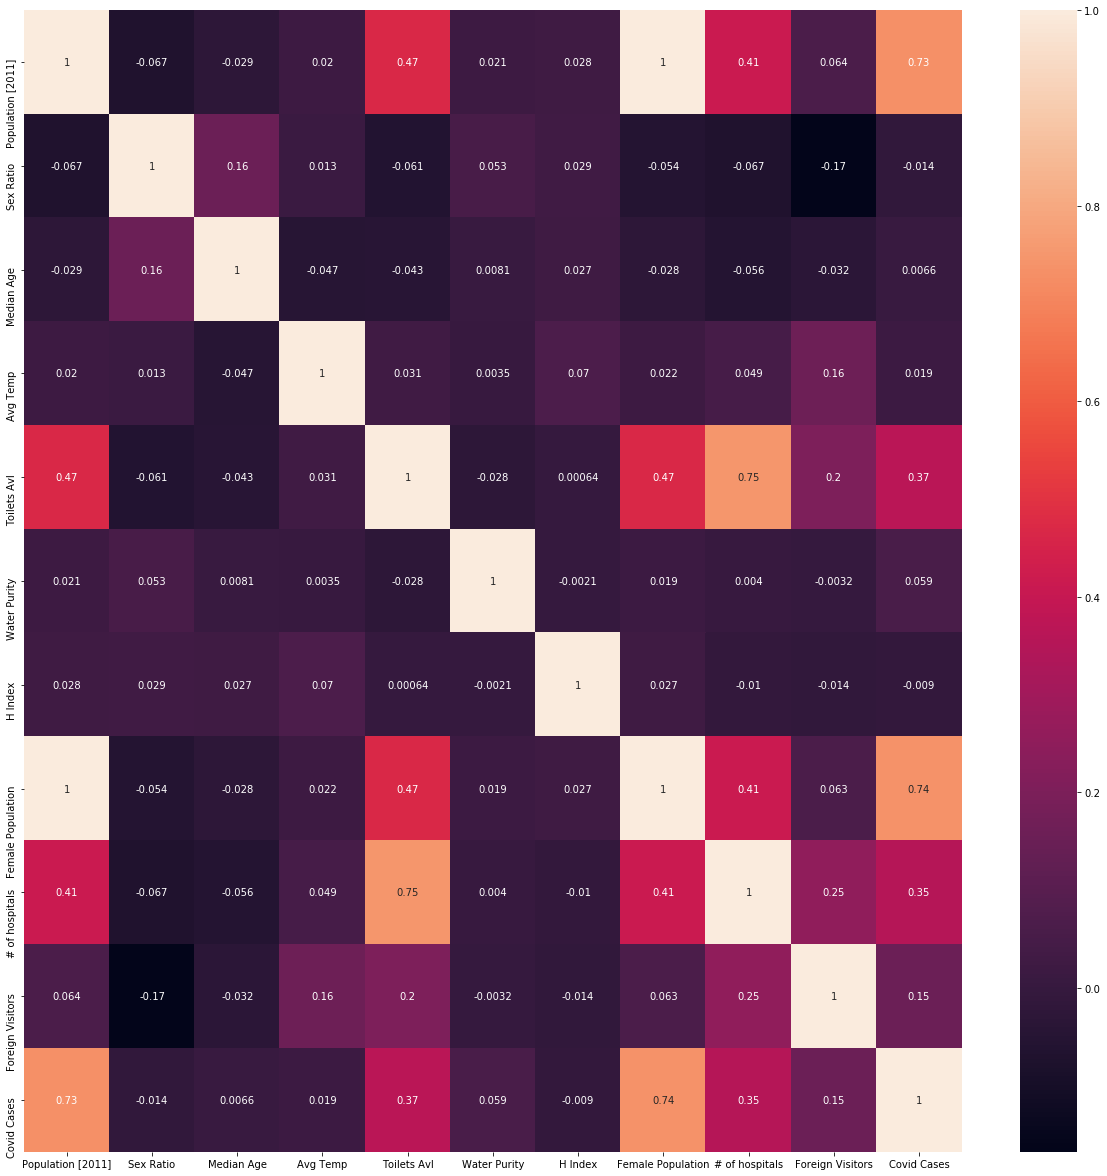

In [141]:
plt.figure(figsize =(21,21))
sns.heatmap(train.corr(), annot = True)